In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt



In [ ]:
# Define the paths to the train and test folders
train_folder_path = r'/content/drive/MyDrive/Projects/Projects/Apple Dataset/apple_disease_classification/Train/'
test_folder_path = r'/content/drive/MyDrive/Projects/Projects/Apple Dataset/apple_disease_classification/Test/'

# Initialize lists to store train and test images and labels
train_images = []
train_labels = []
test_images = []
test_labels = []

# Loop through each subfolder in the train folder
for subfolder in os.listdir(train_folder_path):
    subfolder_path = os.path.join(train_folder_path, subfolder)
    
    # Loop through each image in the subfolder
    for image_name in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (150, 150))  # Resize as per your requirement
        train_images.append(image)
        train_labels.append(subfolder)
    
# Loop through each subfolder in the test folder
for subfolder in os.listdir(test_folder_path):
    subfolder_path = os.path.join(test_folder_path, subfolder)
    
    # Loop through each image in the subfolder
    for image_name in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (150, 150))  # Resize as per your requirement
        test_images.append(image)
        test_labels.append(subfolder)

# Convert the lists to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [ ]:
# Create individual classifiers
classifier_1 = DecisionTreeClassifier()
classifier_2 = RandomForestClassifier()
classifier_3 = KNeighborsClassifier()
classifier_4 = SVC()

# Define the ensemble classifier using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('dt', classifier_1),
    ('rf', classifier_2),
    ('knn', classifier_3),
    ('svc', classifier_4),
], voting='hard')

# Flatten the image arrays
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Define the hyperparameter grid
param_grid = {
    'dt__max_depth': [None, 10, 20],
    'rf__n_estimators': [50, 100, 200],
    'knn__n_neighbors': [3, 5, 7],
    'svc__C': [0.1, 1, 10],
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=ensemble_classifier, param_grid=param_grid, cv=3)
grid_search.fit(train_images_flat, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the ensemble classifier with the best hyperparameters
ensemble_classifier.set_params(**best_params)
ensemble_classifier.fit(train_images_flat, train_labels)

# Make predictions on the test set
y_pred = ensemble_classifier.predict(test_images_flat)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6333333333333333


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the best hyperparameters for each classifier
best_params_dt = {'max_depth': grid_search.best_params_['dt__max_depth']}
best_params_rf = {'n_estimators': grid_search.best_params_['rf__n_estimators']}
best_params_knn = {'n_neighbors': grid_search.best_params_['knn__n_neighbors']}
best_params_svc = {'C': grid_search.best_params_['svc__C']}

# Retrain individual classifiers with best hyperparameters
classifier_1.set_params(**best_params_dt)
classifier_2.set_params(**best_params_rf)
classifier_3.set_params(**best_params_knn)
classifier_4.set_params(**best_params_svc)

# Fit each classifier with training data
classifier_1.fit(train_images_flat, train_labels)
classifier_2.fit(train_images_flat, train_labels)
classifier_3.fit(train_images_flat, train_labels)
classifier_4.fit(train_images_flat, train_labels)



SVC(C=10)

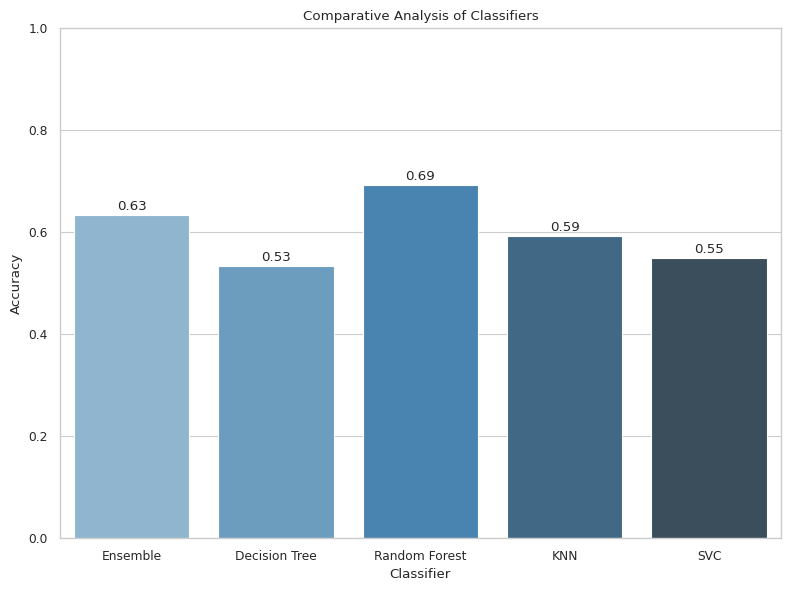

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the best hyperparameters for each classifier
best_params_dt = {'max_depth': grid_search.best_params_['dt__max_depth']}
best_params_rf = {'n_estimators': grid_search.best_params_['rf__n_estimators']}
best_params_knn = {'n_neighbors': grid_search.best_params_['knn__n_neighbors']}
best_params_svc = {'C': grid_search.best_params_['svc__C']}

# Retrain individual classifiers with best hyperparameters
classifier_1.set_params(**best_params_dt)
classifier_2.set_params(**best_params_rf)
classifier_3.set_params(**best_params_knn)
classifier_4.set_params(**best_params_svc)

# Fit each classifier with training data
classifier_1.fit(train_images_flat, train_labels)
classifier_2.fit(train_images_flat, train_labels)
classifier_3.fit(train_images_flat, train_labels)
classifier_4.fit(train_images_flat, train_labels)

# Calculate accuracy scores with best hyperparameters
accuracy_scores = [accuracy] + [
    accuracy_score(test_labels, classifier.predict(test_images_flat)) 
    for classifier in [classifier_1, classifier_2, classifier_3, classifier_4]
]

# Comparative analysis of the ensemble classifier and individual classifiers
classifiers = ['Ensemble', 'Decision Tree', 'Random Forest', 'KNN', 'SVC']

# Set the style and context for the plot
sns.set_style("whitegrid")
sns.set_context("paper")

# Plot the accuracy scores
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=classifiers, y=accuracy_scores, palette="Blues_d")
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparative Analysis of Classifiers')
plt.ylim(0, 1)  # Set the y-axis limits to better display the accuracy range

# Display the values on top of each bar
for i, v in enumerate(accuracy_scores):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center')

plt.tight_layout()  # Adjust spacing for better visual presentation
plt.show()


In [ ]:
#print best hyperparameters
print(best_params)

{'dt__max_depth': 10, 'knn__n_neighbors': 3, 'rf__n_estimators': 200, 'svc__C': 10}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a new RF model
rf_model = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(train_images_flat, train_labels)

# Get the best hyperparameters found by grid search
best_params_rf = grid_search.best_params_

# Train the RF model with the best hyperparameters
rf_model.set_params(**best_params_rf)
rf_model.fit(train_images_flat, train_labels)

# Evaluate the RF model on the test set
accuracy_rf = accuracy_score(test_labels, rf_model.predict(test_images_flat))


In [ ]:
print(accuracy_rf)

0.6916666666666667


In [ ]:
#print best RF parameters
print(best_params_rf)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
import os
import pickle

# Define the directory path
directory = '/content/drive/MyDrive/Projects/Projects/Apple Dataset/'

# Save the trained model to a file
model_filename = 'ensemble_model.pkl'
model_path = os.path.join(directory, model_filename)

with open(model_path, 'wb') as file:
    pickle.dump(ensemble_classifier, file)


In [ ]:
import pickle
import cv2
import numpy as np

# Define the path to the saved model
model_filename = '/content/drive/MyDrive/Projects/Projects/Apple Dataset/ensemble_model.pkl'

# Load the saved model
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Load and preprocess a new image for prediction
new_image_path = '/path/to/new/image.jpg'
new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (150, 150))  # Resize as per your requirement
new_image = np.array([new_image])  # Convert to a 4D array

# Make predictions using the loaded model
predictions = loaded_model.predict(new_image)

# Get the predicted disease category
predicted_category = predictions[0]


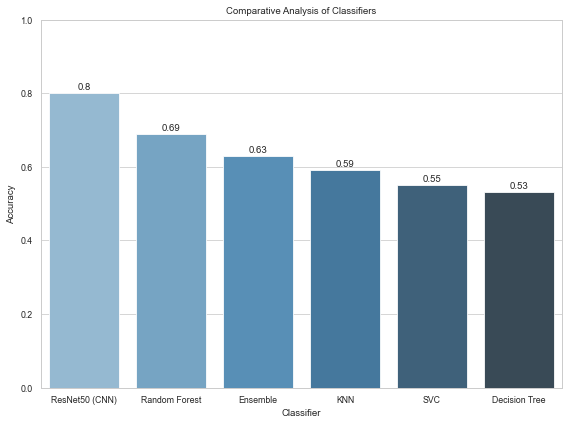

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Comparative analysis of the ensemble classifier and individual classifiers
classifiers = ['ResNet50 (CNN)', 'Random Forest', 'Ensemble', 'KNN', 'SVC', 'Decision Tree']
accuracy_scores = [0.80, 0.69, 0.63, 0.59, 0.55, 0.53]
# Set the style and context for the plot
sns.set_style("whitegrid")
sns.set_context("paper")

# Plot the accuracy scores
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=classifiers, y=accuracy_scores, palette="Blues_d")
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparative Analysis of Classifiers')
plt.ylim(0, 1)  # Set the y-axis limits to better display the accuracy range

# Display the values on top of each bar
for i, v in enumerate(accuracy_scores):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center')

plt.tight_layout()  # Adjust spacing for better visual presentation
plt.show()
